In [1]:
import plotly.express as px, yfinance as yf, numpy as np, pandas as pd

In [2]:
dados = yf.download("BITH11.SA IVVB11.SA")["Adj Close"].dropna().pct_change().fillna(0) + 1
dados = dados.cumprod()
dados = dados.reset_index()

[*********************100%***********************]  2 of 2 completed


In [3]:
df = pd.DataFrame()
for i in np.arange(0, len(dados)):
    acum = dados.head(i).copy()
    acum['ix'] = i
    df = pd.concat([df, acum])

In [ ]:
fig = px.line(df, x = "Date", y = ["BITH11.SA", "IVVB11.SA"],
              animation_frame='ix',
              template = 'plotly_dark',
              width=1000, height=600)

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 15

fig.update_yaxes(range=(df["BITH11.SA"].min(), df["BITH11.SA"].max()))
fig.update_xaxes(range=(df["Date"].min(), df["Date"].max()))

fig.show()

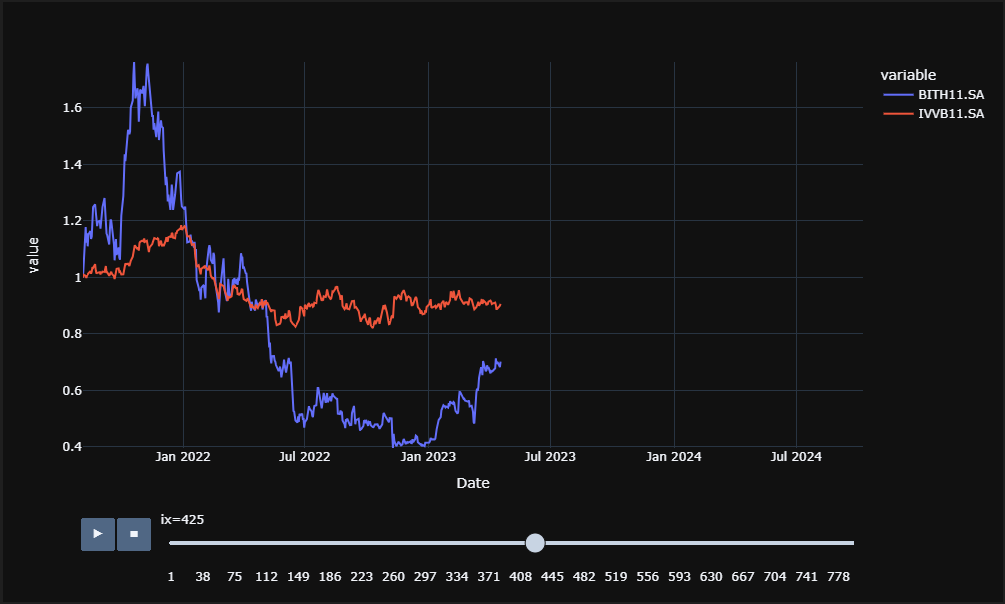

In [5]:
from IPython.display import Image
Image(filename='Gráfico interativo.png') 